## 1. Data Loading & Importing Libraries

In [294]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

turnover.features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,1.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,3.0,0.0,1.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,3.0,0.0,1.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,4.0,0.0,1.0,0.0,support,low


## 2. Data Preparation

## A. Data Overview (basic statistics)

In [3]:
print ("Summary of all columns:")
turnover.summary()

Summary of all columns:
Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'left'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.23) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'         

In [4]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


In [5]:
#Names of the availble numerical values in our dataset and five examles of some of this values
print ("Accessing Numerical values:")
turnover.numerical.head(5)

Accessing Numerical values:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0


In [6]:
#Names of the availble categorical values in our dataset and five examles of some of this values
print ("Accessing Categorial values:")
turnover.numerical.head(5)

Accessing Categorial values:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0


## B. Analysing NA's


In [7]:
print ("Checking for NA's:")
turnover.nas()

Checking for NA's:


[]

In [8]:
print("Since there are no NA's in our Dataset, we will continue to proceed to the conversion of Datatypes")

Since there are no NA's in our Dataset, we will continue to proceed to the conversion of Datatypes


## C. Restructuring to the proper data type


In [9]:
#Now we will type the conversion of one of our variables that we will be using as a target variable
print ("Data conversion: in this case we will be converting our variable Left into numeric")
turnover.to_numerical('left')

Data conversion: in this case we will be converting our variable Left into numeric


In [10]:
#Now we will type the conversion of one of our variables that we will be using as a target variable
print ("Data conversion: in this case we will be converting our variable Left to an integer")
turnover.to_int("left")

Data conversion: in this case we will be converting our variable Left to an integer


In [11]:
#Now we will type the conversion of one of our variables 
print ("Data conversion: in this case we will be converting our variable Work_accident to an integer")
turnover.to_int("Work_accident")

Data conversion: in this case we will be converting our variable Work_accident to an integer


In [12]:
#Now we will type the conversion of one of our variables 
print ("Data conversion: in this case we will be converting our variable promotion_last_5years to an integer")
turnover.to_int("promotion_last_5years")

Data conversion: in this case we will be converting our variable promotion_last_5years to an integer


## D. Setting our Target Variable


In [13]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0,0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0,0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0,0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0,0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0,0,sales,low


In [14]:
#Viewing our target variable
turnover.target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## E. Feature Importance

In [15]:
#Importance of features by using ReliefF algorithm to identify the reltaive importance of features to the target variable
print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.052333488899259754,
 'average_montly_hours': 0.09307556640847725,
 'last_evaluation': 0.07264166569437949,
 'number_project': 0.27921528101873083,
 'promotion_last_5years': 0.00891059403960258,
 'satisfaction_level': 0.09462550250602815,
 'time_spend_company': 0.3794586305753766}

Graphical plot of feature importance:


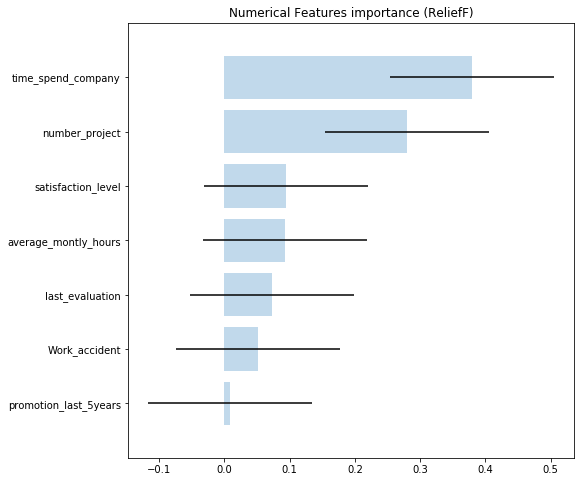

In [16]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## F. One-Hot Encoding

In [17]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0

In [18]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sale

## G. Skewness

In [19]:
#Before possibly removing features that have skewness we need to analyse the leve of skewness present in this variables
print ("Evaluating features skeness:")
turnover.skewed_features()

Evaluating features skeness:


promotion_last_5years    6.636305
sales_management         4.566375
sales_hr                 4.165113
sales_accounting         4.075451
sales_RandD              4.014203
sales_marketing          3.813401
sales_product_mng        3.700350
sales_IT                 3.051756
salary_high              3.035653
Work_accident            2.020947
sales_support            1.975747
time_spend_company       1.853134
sales_technical          1.654042
sales_sales              1.002097
number_project           0.337672
salary_medium            0.283766
average_montly_hours     0.052837
salary_low               0.048951
last_evaluation         -0.026619
satisfaction_level      -0.476313
dtype: float64

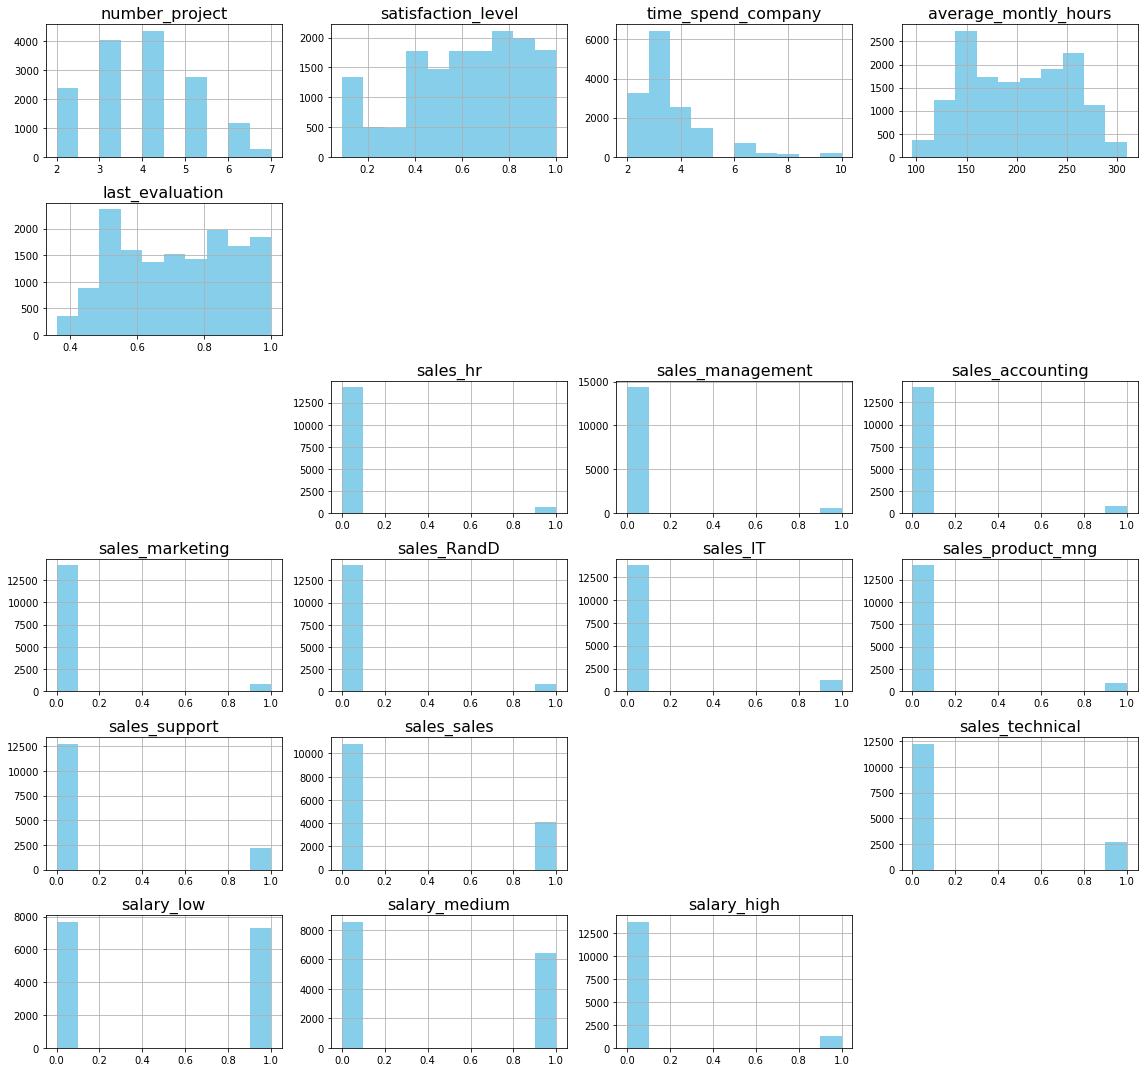

In [20]:
#Before Plotting, let's set the siz of all the plots
plt.figure(figsize=(16,15))

#Plotting the skeness for number_project

plt.subplot(6,4,1)
plt.tight_layout()
plt.title("number_project",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["number_project"].hist(color = "skyblue")

#Plotting the skeness for satisfacation_level

plt.subplot(6,4,2)
plt.tight_layout()
plt.title("satisfaction_level",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["satisfaction_level"].hist(color = "skyblue")

#Plotting the skeness for time_spend_company

plt.subplot(6,4,3)
plt.tight_layout()
plt.title("time_spend_company",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["time_spend_company"].hist(color = "skyblue")

#Plotting the skeness for average_monthly hours

plt.subplot(6,4,4)
plt.tight_layout()
plt.title("average_montly_hours",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["average_montly_hours"].hist(color = "skyblue")

#Plotting the skeness for last_evaluation

plt.subplot(6,4,5)
plt.tight_layout()
plt.title("last_evaluation",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["last_evaluation"].hist(color = "skyblue")

#Plotting the skeness for sales_hr

plt.subplot(6,4,10)
plt.tight_layout()
plt.title("sales_hr",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_hr"].hist(color = "skyblue")

#Plotting the skeness for sales_management

plt.subplot(6,4,11)
plt.tight_layout()
plt.title("sales_management",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_management"].hist(color = "skyblue")

#Plotting the skeness for sales_ accounting

plt.subplot(6,4,12)
plt.tight_layout()
plt.title("sales_accounting",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_accounting"].hist(color = "skyblue")

#Plotting the skeness for sales_marketing

plt.subplot(6,4,13)
plt.tight_layout()
plt.title("sales_marketing",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_marketing"].hist(color = "skyblue")

#Plotting the skeness for sales_RandD

plt.subplot(6,4,14)
plt.tight_layout()
plt.title("sales_RandD",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_RandD"].hist(color = "skyblue")

#Plotting the skeness for sales_IT

plt.subplot(6,4,15)
plt.tight_layout()
plt.title("sales_IT",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_IT"].hist(color = "skyblue")

#Plotting the skeness for sales_product_mng

plt.subplot(6,4,16)
plt.tight_layout()
plt.title("sales_product_mng",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_product_mng"].hist(color = "skyblue")

#Plotting the skeness for sales_support

plt.subplot(6,4,17)
plt.tight_layout()
plt.title("sales_support",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_support"].hist(color = "skyblue")

#Plotting the skeness for sales_sales

plt.subplot(6,4,18)
plt.tight_layout()
plt.title("sales_sales",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_sales"].hist(color = "skyblue")

#Plotting the skeness for sales_technical

plt.subplot(6,4,20)
plt.tight_layout()
plt.title("sales_technical",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_technical"].hist(color = "skyblue")

#Plotting the skeness for salary_low

plt.subplot(6,4,21)
plt.tight_layout()
plt.title("salary_low",fontdict = {'fontsize':16, 'fontweight':1},loc = 'center')
turnover.features["salary_low"].hist(color = "skyblue")

#Plotting the skeness for salary_medium

plt.subplot(6,4,22)
plt.tight_layout()
plt.title("salary_medium",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["salary_medium"].hist(color = "skyblue")

#Plotting the skeness for salary_high

plt.subplot(6,4,23)
plt.tight_layout()
plt.title("salary_high",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["salary_high"].hist(color = "skyblue")


plt.show()


**Fixing Skewness**


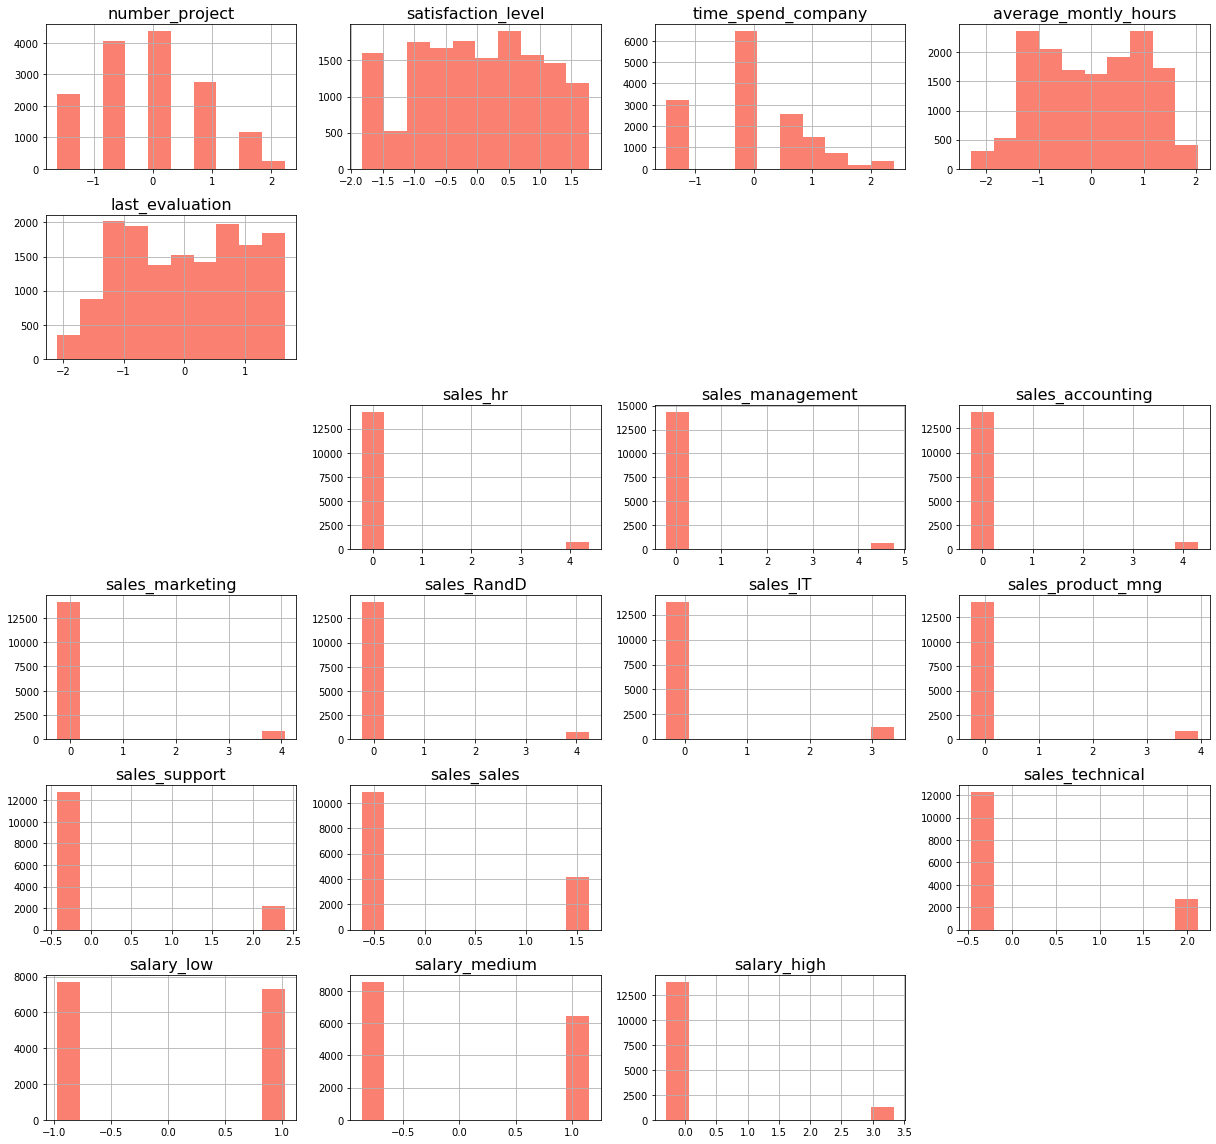

In [21]:
#Fixing the skeness that we may have for all the variables in our dataset
turnover.fix_skewness()

#Before Plotting, let's set the siz of all the plots
plt.figure(figsize=(17,16))

#Plotting the skeness for number_project

plt.subplot(6,4,1)
plt.tight_layout()
plt.title("number_project",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["number_project"].hist(color = "salmon")

#Plotting the skeness for satisfacation_level

plt.subplot(6,4,2)
plt.tight_layout()
plt.title("satisfaction_level",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["satisfaction_level"].hist(color = "salmon")

#Plotting the skeness for time_spend_company

plt.subplot(6,4,3)
plt.tight_layout()
plt.title("time_spend_company",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["time_spend_company"].hist(color = "salmon")

#Plotting the skeness for average_monthly hours

plt.subplot(6,4,4)
plt.tight_layout()
plt.title("average_montly_hours",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["average_montly_hours"].hist(color = "salmon")

#Plotting the skeness for last_evaluation

plt.subplot(6,4,5)
plt.tight_layout()
plt.title("last_evaluation",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["last_evaluation"].hist(color = "salmon")

#Plotting the skeness for sales_hr

plt.subplot(6,4,10)
plt.tight_layout()
plt.title("sales_hr",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_hr"].hist(color = "salmon")

#Plotting the skeness for sales_management

plt.subplot(6,4,11)
plt.tight_layout()
plt.title("sales_management",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_management"].hist(color = "salmon")

#Plotting the skeness for sales_ accounting

plt.subplot(6,4,12)
plt.tight_layout()
plt.title("sales_accounting",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_accounting"].hist(color = "salmon")

#Plotting the skeness for sales_marketing

plt.subplot(6,4,13)
plt.tight_layout()
plt.title("sales_marketing",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_marketing"].hist(color = "salmon")

#Plotting the skeness for sales_RandD

plt.subplot(6,4,14)
plt.tight_layout()
plt.title("sales_RandD",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_RandD"].hist(color = "salmon")

#Plotting the skeness for sales_IT

plt.subplot(6,4,15)
plt.tight_layout()
plt.title("sales_IT",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_IT"].hist(color = "salmon")

#Plotting the skeness for sales_product_mng

plt.subplot(6,4,16)
plt.tight_layout()
plt.title("sales_product_mng",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_product_mng"].hist(color = "salmon")

#Plotting the skeness for sales_support

plt.subplot(6,4,17)
plt.tight_layout()
plt.title("sales_support",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_support"].hist(color = "salmon")

#Plotting the skeness for sales_sales

plt.subplot(6,4,18)
plt.tight_layout()
plt.title("sales_sales",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_sales"].hist(color = "salmon")

#Plotting the skeness for sales_technical

plt.subplot(6,4,20)
plt.tight_layout()
plt.title("sales_technical",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["sales_technical"].hist(color = "salmon")

#Plotting the skeness for salary_low

plt.subplot(6,4,21)
plt.tight_layout()
plt.title("salary_low",fontdict = {'fontsize':16, 'fontweight':1},loc = 'center')
turnover.features["salary_low"].hist(color = "salmon")

#Plotting the skeness for salary_medium

plt.subplot(6,4,22)
plt.tight_layout()
plt.title("salary_medium",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["salary_medium"].hist(color = "salmon")

#Plotting the skeness for salary_high

plt.subplot(6,4,23)
plt.tight_layout()
plt.title("salary_high",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["salary_high"].hist(color = "salmon")




plt.show()

## H. Scaling

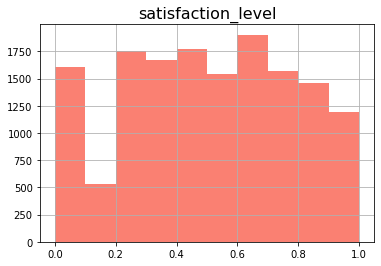

In [22]:
#Scaling our numerical variables to range between 0 and 1
turnover.scale(method ='MinMaxScaler')

#Basic plot, to check if we were able to succesfully scale this variables
plt.title("satisfaction_level",fontdict = {"fontsize":16, "fontweight":1},loc = "center")
turnover.features["satisfaction_level"].hist(color = "salmon")

plt.show()

## I. Dataset Splitting

In [23]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level,time_spend_company,salary_high,salary_low,salary_medium
2560,0.0,0.464335,0.535738,0.485294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.557766,0.554511,0.0,0.0,1.0
12305,0.0,0.216313,0.174578,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302229,0.347557,0.0,0.0,1.0
6513,0.0,0.216313,0.984636,0.676670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.582400,0.554511,0.0,0.0,1.0
7083,0.0,0.146925,0.347925,0.264433,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.440444,0.347557,1.0,0.0,0.0
6952,1.0,0.473740,0.347925,0.485294,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.954107,0.554511,1.0,0.0,0.0


In [24]:
y.train.head(5)

,left
2560,0
12305,1
6513,0
7083,0
6952,0


## 3. Baseline

In [25]:
clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)

#Measuring Accuracy of our Model

print("Accuracy: ", accuracy_score(y.test, pred_baseline).round(3))

#Measuring F1
print("F1: ", f1_score(y.test, pred_baseline))

Accuracy:  0.799
F1:  0.5144694533762058


## 1st ATTEMPT

For this first attempet we will perform analysis which includes outliers but with the removal of some not significant variables, in this case we decided to remove all variables related to sales.

## 1) DATA LOADING & IMPORTING LIBRARIES

In [197]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

## A. Data Description

In [198]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


## 2) DATA PREPARATION & DATA TRANSFORMATION

## A. Setting Target Variable

In [199]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. One-Hot Encoding

In [200]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05

In [201]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.

## C. Fixing Scale & Skewness

In [202]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Feature importance after One-hot encoding

In [203]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.023638242549502496,
 'average_montly_hours': 0.07205417363177988,
 'last_evaluation': 0.058494472809333904,
 'number_project': 0.2703413560904036,
 'promotion_last_5years': 0.005583705580371965,
 'salary_high': 0.03847923194879565,
 'salary_low': 0.11581105407027008,
 'salary_medium': 0.09860657377158362,
 'sales_IT': 0.01946463097539824,
 'sales_RandD': 0.009247283152210227,
 'sales_accounting': 0.011800786719114739,
 'sales_hr': 0.025155010334022062,
 'sales_management': 0.01102073471564777,
 'sales_marketing': 0.007960530702046808,
 'sales_product_mng': 0.00436029068604577,
 'sales_sales': 0.06840122674844934,
 'sales_support': 0.05451030068671271,
 'sales_technical': 0.08537902526835106,
 'satisfaction_level': 0.07667409243195107,
 'time_spend_company': 0.32653176878459056}

Graphical plot of feature importance:


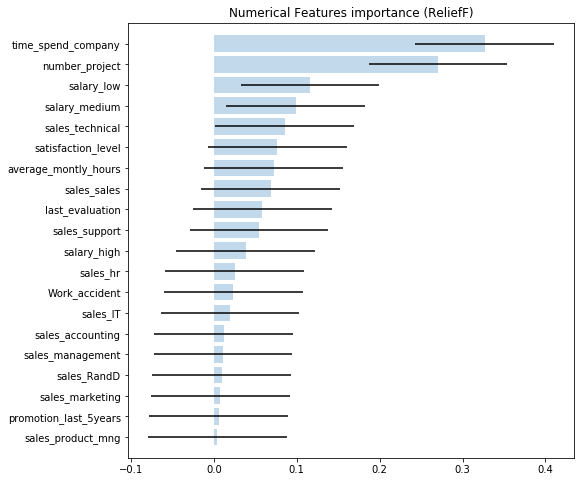

In [204]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## B. Drop not Relevant Features

In [205]:
#In this first try we will remove/drop all variables related to sales because they don't demonstrate high importance to the model

turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')

In [206]:
#Check if the variables were removed
turnover.summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(0.0) 1stQ(0.32) Med.(0.53) Mean(0.52) 3rdQ(0.73) Max.(1.0)
'last_evaluation'      : float64    Min.(0.0) 1stQ(0.31) Med.(0.56) Mean(0.55) 3rdQ(0.79) Max.(1.0)
'number_project'       : float64    Min.(0.0) 1stQ(0.26) Med.(0.48) Mean(0.42) 3rdQ(0.67) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(0.99)
'satisfaction_level'   : float64    Min.(0.0) 1stQ(0.29) Med.(0.50) Mean(0.50) 3rdQ(0.73) Max.(0.99)
'time_spend_company'   : float64    Min.(0.0) 1stQ(0.34) Med.(0.34) Mean(0.38) 3rdQ(0.55) Max.(1.0)
'salary_high'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(0.99)
'salary_low'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(0.9

## C. Dataset Splitting

In [207]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company,salary_high,salary_low,salary_medium
2560,0.0,0.464335,0.535738,0.485294,0.0,0.557766,0.554511,0.0,0.0,1.0
12305,0.0,0.216313,0.174578,0.000000,0.0,0.302229,0.347557,0.0,0.0,1.0
6513,0.0,0.216313,0.984636,0.676670,0.0,0.582400,0.554511,0.0,0.0,1.0
7083,0.0,0.146925,0.347925,0.264433,0.0,0.440444,0.347557,1.0,0.0,0.0
6952,1.0,0.473740,0.347925,0.485294,0.0,0.954107,0.554511,1.0,0.0,0.0


In [208]:
y.train.head(5)

,left
2560,0.0
12305,1.0
6513,0.0
7083,0.0
6952,0.0


## D. Cross Validation

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.5231259968102074


## E. Check Results: Weighted F1

In [210]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))


F1: 0.5231259968102074
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      2287
         1.0       0.61      0.46      0.52       713

    accuracy                           0.80      3000
   macro avg       0.72      0.68      0.70      3000
weighted avg       0.79      0.80      0.79      3000



## 2nd ATTEMPT

For this second attempt we will perform analysis which does not include outliers but with the removal of some not significant variables, in this case we decided to remove all variables related to sales.

## 1) DATA LOADING & IMPORTING LIBRARIES

In [15]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

## A. Data Description

In [285]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


## 2) DATA PREPARATION & TRANSFORMATION

## A. Setting Target Variable


In [286]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. One-Hot Encoding

In [287]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05

In [288]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.

## C. Fixing Scale & Skewness

In [289]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Removing Outliers

In [216]:
#Identifying indeces that may contain outliers

turnover.outliers()

array([   18,    54,    82,    86,   105,   168,   171,   196,   239,
         287,   307,   354,   397,   441,   476,   479,   584,   632,
         664,   751,   765,   797,   849,   897,   916,  1031,  1138,
        1358,  1417,  1481,  1502,  1514,  1573,  1578,  1667,  1721,
        1775,  1957,  1992,  2006,  2011,  2031,  2043,  2088,  2091,
        2125,  2137,  2154,  2180,  2187,  2188,  2214,  2250,  2289,
        2296,  2299,  2327,  2330,  2346,  2352,  2376,  2404,  2410,
        2420,  2426,  2452,  2475,  2498,  2539,  2550,  2591,  2622,
        2723,  2769,  2788,  2801,  2812,  2819,  2846,  2868,  2929,
        2932,  2941,  2983,  3027,  3071,  3098,  3099,  3106,  3124,
        3138,  3245,  3320,  3365,  3434,  3544,  3560,  3597,  3598,
        3632,  3673,  3732,  3737,  3786,  3822,  3843,  3874,  3883,
        3915,  3921,  3943,  4000,  4015,  4062,  4068,  4073,  4094,
        4169,  4187,  4212,  4215,  4240,  4263,  4323,  4352,  4382,
        4392,  4431,

In [217]:
#Dropping outliers

turnover.drop_samples(turnover.outliers())

## B. Feature importance after One-hot encoding

In [218]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.029294446384910414,
 'average_montly_hours': 0.07452175317066259,
 'last_evaluation': 0.06094791467436458,
 'number_project': 0.2926336011177127,
 'promotion_last_5years': -0.00092560251484457,
 'salary_high': 0.04305623471882601,
 'salary_low': 0.12245546629409639,
 'salary_medium': 0.10449877750611125,
 'sales_IT': 0.02209919664687323,
 'sales_RandD': 0.012850157177785681,
 'sales_accounting': 0.013793223891023535,
 'sales_hr': 0.02859238560950039,
 'sales_management': 0.005934334614041223,
 'sales_marketing': 0.008470136220747423,
 'sales_product_mng': 0.007300034928396765,
 'sales_sales': 0.07346489696122899,
 'sales_support': 0.05974851554313592,
 'sales_technical': 0.09070206077540884,
 'satisfaction_level': 0.08114290616461625,
 'time_spend_company': 0.34323087670275954}

Graphical plot of feature importance:


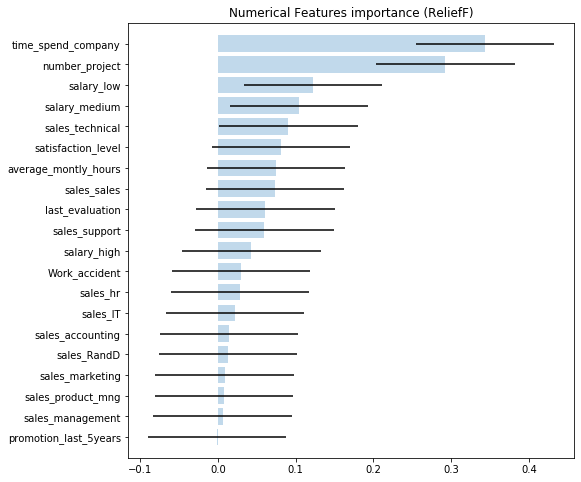

In [219]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## C. Drop not Relevant Features

In [220]:
#In this first try we will remove/drop all variables related to sales because they don't demonstrate high importance to the model

turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')

In [221]:
#Check if the variables were removed
turnover.summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(0.0) 1stQ(0.32) Med.(0.53) Mean(0.53) 3rdQ(0.73) Max.(1.0)
'last_evaluation'      : float64    Min.(0.0) 1stQ(0.31) Med.(0.58) Mean(0.56) 3rdQ(0.79) Max.(1.0)
'number_project'       : float64    Min.(0.0) 1stQ(0.26) Med.(0.48) Mean(0.42) 3rdQ(0.67) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(0.99)
'satisfaction_level'   : float64    Min.(0.0) 1stQ(0.30) Med.(0.52) Mean(0.51) 3rdQ(0.73) Max.(0.99)
'time_spend_company'   : float64    Min.(0.0) 1stQ(0.34) Med.(0.34) Mean(0.38) 3rdQ(0.55) Max.(1.0)
'salary_high'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(0.99)
'salary_low'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.43) 3rdQ(0.9

## D. Dataset Splitting

In [222]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company,salary_high,salary_low,salary_medium
129,0.0,0.200511,0.221972,0.000000,0.0,0.215786,0.347557,0.0,1.0,0.0
4119,1.0,0.231996,0.206184,0.264433,0.0,0.658668,0.000000,0.0,0.0,1.0
1071,0.0,0.211059,0.190386,0.000000,0.0,0.234352,0.347557,0.0,1.0,0.0
10869,1.0,0.231996,0.269277,0.264433,0.0,0.557766,0.000000,0.0,1.0,0.0
2131,0.0,0.069307,0.174578,0.485294,0.0,0.836269,0.347557,0.0,1.0,0.0


In [223]:
y.train.head(5)

,left
129,1.0
4119,0.0
1071,1.0
10869,0.0
2131,0.0


## E. Cross Validation

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.5910596026490067


## F. Check Results: Weighted F1

In [225]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))

F1: 0.5910596026490067
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      2177
         1.0       0.68      0.52      0.59       686

    accuracy                           0.83      2863
   macro avg       0.77      0.72      0.74      2863
weighted avg       0.82      0.83      0.82      2863



## 3rd Attempt

For this third attempet we will perform analysis which does not include outliers but with the removal of some not significant variables, in this case we decided to remove all variables related to sales & salary.

## 1) DATA LOADING & IMPORTING LIBRARIES

In [259]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)


## A. Data Description

In [260]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set



## 2) DATA PREPARATION & TRANSFORMATION

## A. Setting Target Variable

In [227]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. One-Hot Encoding

In [228]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05

In [229]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.

## C. Fixing Scale & Skewness

In [230]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Outliers

In [231]:
#Identifying indeces that may contain outliers

turnover.outliers()

array([   18,    54,    82,    86,   105,   168,   171,   196,   239,
         287,   307,   354,   397,   441,   476,   479,   584,   632,
         664,   751,   765,   797,   849,   897,   916,  1031,  1138,
        1358,  1417,  1481,  1502,  1514,  1573,  1578,  1667,  1721,
        1775,  1957,  1992,  2006,  2011,  2031,  2043,  2088,  2091,
        2125,  2137,  2154,  2180,  2187,  2188,  2214,  2250,  2289,
        2296,  2299,  2327,  2330,  2346,  2352,  2376,  2404,  2410,
        2420,  2426,  2452,  2475,  2498,  2539,  2550,  2591,  2622,
        2723,  2769,  2788,  2801,  2812,  2819,  2846,  2868,  2929,
        2932,  2941,  2983,  3027,  3071,  3098,  3099,  3106,  3124,
        3138,  3245,  3320,  3365,  3434,  3544,  3560,  3597,  3598,
        3632,  3673,  3732,  3737,  3786,  3822,  3843,  3874,  3883,
        3915,  3921,  3943,  4000,  4015,  4062,  4068,  4073,  4094,
        4169,  4187,  4212,  4215,  4240,  4263,  4323,  4352,  4382,
        4392,  4431,

In [232]:
#Dropping outliers

turnover.drop_samples(turnover.outliers())

## B. Feature Importance One-Hot Encoding

In [233]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.029294446384910414,
 'average_montly_hours': 0.07452175317066259,
 'last_evaluation': 0.06094791467436458,
 'number_project': 0.2926336011177127,
 'promotion_last_5years': -0.00092560251484457,
 'salary_high': 0.04305623471882601,
 'salary_low': 0.12245546629409639,
 'salary_medium': 0.10449877750611125,
 'sales_IT': 0.02209919664687323,
 'sales_RandD': 0.012850157177785681,
 'sales_accounting': 0.013793223891023535,
 'sales_hr': 0.02859238560950039,
 'sales_management': 0.005934334614041223,
 'sales_marketing': 0.008470136220747423,
 'sales_product_mng': 0.007300034928396765,
 'sales_sales': 0.07346489696122899,
 'sales_support': 0.05974851554313592,
 'sales_technical': 0.09070206077540884,
 'satisfaction_level': 0.08114290616461625,
 'time_spend_company': 0.34323087670275954}

Graphical plot of feature importance:


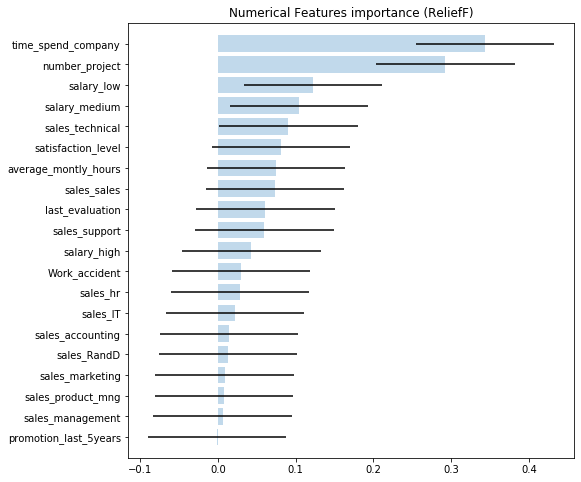

In [234]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## C. Drop Not Relevant Features

In [235]:
#In this first try we will remove/drop all variables related to sales & salary because they don't demonstrate high importance to the model

turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')
turnover.drop_columns('salary_high')
turnover.drop_columns('salary_low')
turnover.drop_columns('salary_medium')

In [236]:
#Check if the variables were removed
turnover.summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(0.0) 1stQ(0.32) Med.(0.53) Mean(0.53) 3rdQ(0.73) Max.(1.0)
'last_evaluation'      : float64    Min.(0.0) 1stQ(0.31) Med.(0.58) Mean(0.56) 3rdQ(0.79) Max.(1.0)
'number_project'       : float64    Min.(0.0) 1stQ(0.26) Med.(0.48) Mean(0.42) 3rdQ(0.67) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(0.99)
'satisfaction_level'   : float64    Min.(0.0) 1stQ(0.30) Med.(0.52) Mean(0.51) 3rdQ(0.73) Max.(0.99)
'time_spend_company'   : float64    Min.(0.0) 1stQ(0.34) Med.(0.34) Mean(0.38) 3rdQ(0.55) Max.(1.0)
'left'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.24) 3rdQ(0.0) Max.(1.0)


## D. Dataset Splitting

In [237]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
129,0.0,0.200511,0.221972,0.000000,0.0,0.215786,0.347557
4119,1.0,0.231996,0.206184,0.264433,0.0,0.658668,0.000000
1071,0.0,0.211059,0.190386,0.000000,0.0,0.234352,0.347557
10869,1.0,0.231996,0.269277,0.264433,0.0,0.557766,0.000000
2131,0.0,0.069307,0.174578,0.485294,0.0,0.836269,0.347557


## E. Cross-Validation

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.5303678357570574


## F. Check Results: Weighted F1

In [239]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))

F1: 0.5303678357570574
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2177
         1.0       0.64      0.45      0.53       686

    accuracy                           0.81      2863
   macro avg       0.74      0.69      0.70      2863
weighted avg       0.79      0.81      0.80      2863



## 4th ATTEMPT


As seen, from the second to the third attempt we just decided to remove the salary variables but as seen from our F1 score, the score actually went down. So therefore we will just remove the sales variables, remove outliers and preform some discritization to see if we can improve the results. But so far as seen from  our results, our highest score was on the second attempt.

## 1) DATA LOADING & IMPORTING LIBRARIES

In [40]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

## A. Data Description

In [41]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


## 2) DATA PREPARATION & TRANSFORMATION

## A. Setting Target Variable

In [42]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. Discretization


In [43]:
turnover.discretize('number_project', [(2, 3),(4, 5),(6, 7)],
                   category_names=['a few', 'a couple', 'many']).summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'left'      

## C. One-Hot Encoding

In [44]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.

In [45]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3r

In [46]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("number_project").summary()

Features Summary (all):
'Work_accident'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'   : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'        : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'promotion_last_5years'  : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(1.0) Max.(1.0)
'sales_IT'               : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.0

## D. Fixing Scale & Skewness


In [47]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Outliers

In [48]:
#Identifying indeces that may contain outliers

turnover.outliers()

array([   18,    54,    56, ..., 14940, 14949, 14975])

In [49]:
#Dropping outliers

turnover.drop_samples(turnover.outliers())

## B. Feature Importance One-Hot Encoding

In [249]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.025893626184324076,
 'average_montly_hours': 0.07416812126718833,
 'last_evaluation': 0.06447957174057291,
 'number_project_a couple': 0.09545291415445915,
 'number_project_a few': 0.14970212460522103,
 'number_project_many': 0.00933103646281947,
 'promotion_last_5years': -0.0011269020958943486,
 'salary_high': 0.04126471432672873,
 'salary_low': 0.1263242894056771,
 'salary_medium': 0.10702339936835374,
 'sales_IT': 0.02037037037037052,
 'sales_RandD': 0.009682744760264215,
 'sales_accounting': 0.008584553545793907,
 'sales_hr': 0.02899799023830055,
 'sales_management': 0.002788544358311777,
 'sales_marketing': 0.0088357737582544,
 'sales_product_mng': 0.005914441573356308,
 'sales_sales': 0.07161211599195784,
 'sales_support': 0.04959445879988305,
 'sales_technical': 0.09484639678437445,
 'satisfaction_level': 0.08741632614724239,
 'time_spend_company': 0.32279643985068385}

Graphical plot of feature importance:


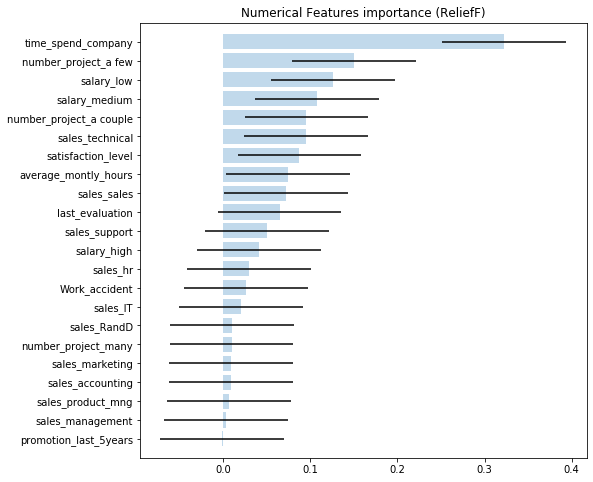

In [250]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## C. Drop Not Relevant Features


In [50]:

#In this first try we will remove/drop all variables related to sales & salary because they don't demonstrate high importance to the model

turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')
turnover.drop_columns('salary_high')
turnover.drop_columns('salary_low')
turnover.drop_columns('salary_medium')

In [51]:
#Check if the variables were removed
turnover.summary()

Features Summary (all):
'Work_accident'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'   : float64    Min.(0.0) 1stQ(0.32) Med.(0.54) Mean(0.53) 3rdQ(0.73) Max.(1.0)
'last_evaluation'        : float64    Min.(0.0) 1stQ(0.31) Med.(0.58) Mean(0.56) 3rdQ(0.79) Max.(1.0)
'promotion_last_5years'  : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.00) 3rdQ(0.0) Max.(0.99)
'satisfaction_level'     : float64    Min.(0.0) 1stQ(0.30) Med.(0.53) Mean(0.52) 3rdQ(0.73) Max.(0.99)
'time_spend_company'     : float64    Min.(0.0) 1stQ(0.34) Med.(0.34) Mean(0.37) 3rdQ(0.55) Max.(1.0)
'number_project_a few'   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.28) 3rdQ(1.0) Max.(1.0)
'number_project_a couple': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_many'    : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.00) 3rdQ(0.0) Max.(0.99)
'left'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Me

## D. Dataset Splitting


In [52]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,average_montly_hours,last_evaluation,promotion_last_5years,satisfaction_level,time_spend_company,number_project_a few,number_project_a couple,number_project_many
8098,1.0,0.556893,0.441994,0.0,0.057300,0.691654,0.0,0.0,0.0
10283,0.0,0.879532,0.737795,0.0,0.072484,0.554511,0.0,1.0,0.0
2896,0.0,0.724654,0.253518,0.0,0.418136,0.347557,1.0,0.0,0.0
4233,0.0,0.668348,0.598060,0.0,0.620089,0.347557,0.0,1.0,0.0
728,0.0,0.303698,0.221972,0.0,0.234352,0.347557,0.0,0.0,0.0


## E. Cross-Validation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.5950413223140495


## F. Check Results: Weighted F1

In [54]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))

F1: 0.5950413223140495
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      2122
         1.0       0.66      0.54      0.60       665

    accuracy                           0.82      2787
   macro avg       0.76      0.73      0.74      2787
weighted avg       0.82      0.82      0.82      2787



## 5th ATTEMPT

On this attempt we have decided to discritize two variables, number_project and satisfaction_level, remove outliers related to sales and promotion in last 5 years, since they seemed the least relevant according to the feature importance.

## 1) DATA LOADING & IMPORTING LIBRARIES

In [256]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

## A. Data Description

In [257]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


## 2) DATA PREPARATION & TRANSFORMATION

## A. Setting Target Variable

In [258]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. Discretization


In [259]:
turnover.discretize('number_project', [(2, 3),(4, 5),(6, 7)],
                   category_names=['a few', 'a couple', 'many']).summary()
turnover.discretize('satisfaction_level', [(0, 0.25),(0.26, 0.51),(0.52, 0.77),(0.78, 1)],
                   category_names=['low', 'medium-low', 'medium-high','high']).summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'left'      

## C. One-Hot Encoding

In [260]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : category   4 categs. 'medium-low'(5122, 0.3525) 'high'(4441, 0.3056) 'low'(3196, 0.2199) 'medium-high'(1773, 0.1220) 
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'     

In [261]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3r

In [262]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("number_project").summary()

Features Summary (all):
'Work_accident'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'   : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'        : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'promotion_last_5years'  : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(1.0) Max.(1.0)
'sales_IT'               : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.0

In [263]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("satisfaction_level").summary()

Features Summary (all):
'Work_accident'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'          : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'               : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project_a couple'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_a few'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_many'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'                    : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_mediu

## D. Fixing Scale & Skewness


In [264]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Outliers

In [265]:
#Identifying indeces that may contain outliers

turnover.outliers()

array([   18,    50,    54, ..., 14966, 14975, 14990])

In [266]:
#Dropping outliers

turnover.drop_samples(turnover.outliers())

## B. Feature Importance One-Hot Encoding

In [275]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.025110576550011542,
 'average_montly_hours': 0.04914616884150478,
 'last_evaluation': 0.031899305089157316,
 'number_project_a couple': 0.07480794599208371,
 'number_project_a few': 0.14198029021494488,
 'number_project_many': 0.00573446108481417,
 'promotion_last_5years': 0.00039962753162101284,
 'salary_high': 0.04195701094125737,
 'salary_low': 0.11467370218049026,
 'salary_medium': 0.09482424148366432,
 'sales_IT': 0.012244897959183777,
 'sales_RandD': 0.0125552882750058,
 'sales_accounting': 0.004248467447815615,
 'sales_hr': 0.03302940948242312,
 'sales_management': 0.004050593621479016,
 'sales_marketing': 0.003503530689842479,
 'sales_product_mng': 0.0031039031582214462,
 'sales_sales': 0.06707922712811319,
 'sales_support': 0.041980290214944614,
 'sales_technical': 0.07060603709164127,
 'satisfaction_level_high': 0.1633506634592991,
 'satisfaction_level_low': 0.08784821913556135,
 'satisfaction_level_medium-high': 0.1967641809575518,
 'satisfaction_level_me

Graphical plot of feature importance:


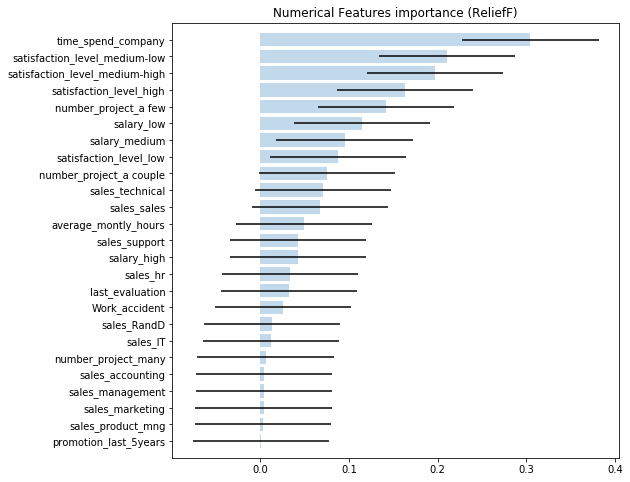

In [276]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## C. Drop Not Relevant Features


In [267]:
turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')
turnover.drop_columns('promotion_last_5years')


In [268]:
#Check if the variables were removed
turnover.summary()

Features Summary (all):
'Work_accident'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.13) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'          : float64    Min.(0.0) 1stQ(0.32) Med.(0.53) Mean(0.52) 3rdQ(0.73) Max.(1.0)
'last_evaluation'               : float64    Min.(0.0) 1stQ(0.31) Med.(0.56) Mean(0.56) 3rdQ(0.79) Max.(1.0)
'number_project_a couple'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_a few'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_many'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(0.99)
'salary_high'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(0.99)
'salary_low'                    : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(0.99) Max.(0.99)
'time_spend_

## D. Dataset Splitting


In [269]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)


,Work_accident,average_montly_hours,last_evaluation,number_project_a couple,number_project_a few,number_project_many,salary_high,salary_low,salary_medium,time_spend_company,satisfaction_level_low,satisfaction_level_medium-low,satisfaction_level_medium-high,satisfaction_level_high
5682,0.0,0.792555,0.969265,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
10055,0.0,0.672717,0.535738,1.0,0.0,0.0,1.0,0.0,0.0,0.861922,0.0,0.0,0.0,1.0
1903,0.0,0.650805,0.363626,1.0,0.0,0.0,0.0,1.0,0.0,0.691654,0.0,1.0,0.0,0.0
3065,0.0,0.497103,0.613619,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0
5679,1.0,0.720360,0.861460,1.0,0.0,0.0,0.0,0.0,1.0,0.347557,0.0,0.0,0.0,1.0


## E. Cross-Validation

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.7902973395931142


## F. Check Results: Weighted F1

In [271]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))

F1: 0.7902973395931142
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1936
         1.0       0.79      0.79      0.79       642

    accuracy                           0.90      2578
   macro avg       0.86      0.86      0.86      2578
weighted avg       0.90      0.90      0.90      2578



## 6th ATTEMPT

## 1) DATA LOADING & IMPORTING LIBRARIES

In [237]:
from dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

turnover = Dataset('/Users/kuka/Downloads/turnover.csv', delimiter=',', header=0)

## A. Data Description

In [238]:
turnover.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


## 2) Data Preparation & Transformation

## A. Setting Target Variable

In [239]:
#Setting the target variable of staff/employee attrition, in other words, employees who have left
print ("Setting target variable: left")
turnover.set_target("left")

#Reviewing the first 5 rows, but this time with our target variable "left" gone
print ("First 5 rows of dataset without left")
turnover.features.head(5)

Setting target variable: left
First 5 rows of dataset without left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


## B. Discritization

In [240]:
turnover.discretize('number_project', [(2, 3),(4, 5),(6, 7)],
                   category_names=['a few', 'a couple', 'many']).summary()
turnover.discretize('satisfaction_level', [(0, 0.25),(0.26, 0.51),(0.52, 0.77),(0.78, 1)],
                   category_names=['low', 'medium-low', 'medium-high','high']).summary()
turnover.discretize('time_spend_company', [(2, 4),(5, 7),(8, 10)],
                   category_names=['under 5 years', '5 to 7 years', 'above 8 years']).summary()

turnover.discretize('average_montly_hours', [(96, 164),(165, 244),(245, 310)],
                   category_names=['low', 'average', 'high']).summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'left'      

## C. One-Hot Encoding

In [241]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("sales").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : category   3 categs. 'low'(6432, 0.4349) 'high'(4668, 0.3156) 'average'(3691, 0.2495) 
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 
'satisfaction_level'   : category   4 categs. 'medium-low'(5122, 0.3525) 'high'(4441, 0.3056) 'low'(3196, 0.2199) 'medium-high'(1773, 0.1220) 
'time_spend_company'   : category   3 categs. 'under 5 years'(9000, 0.8893) '5 to 7 years'(906, 0.0895) 'nan'(214, 0.0211) 
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3r

In [242]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("salary").summary()

Features Summary (all):
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours' : category   3 categs. 'low'(6432, 0.4349) 'high'(4668, 0.3156) 'average'(3691, 0.2495) 
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : category   3 categs. 'nan'(4055, 0.5734) 'a couple'(2761, 0.3904) 'many'(256, 0.0362) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales_IT'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_hr'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'sales_management'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mea

In [243]:
#Tranforming the salary variable into dummyfied versions, which will produce more variable
turnover_final = turnover.onehot_encode("number_project").summary()

Features Summary (all):
'Work_accident'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'   : category   3 categs. 'low'(6432, 0.4349) 'high'(4668, 0.3156) 'average'(3691, 0.2495) 
'last_evaluation'        : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'promotion_last_5years'  : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(1.0) Max.(1.0)
'sales_IT'               : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'sales_RandD'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'sales_accounting'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0

In [244]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("satisfaction_level").summary()

Features Summary (all):
'Work_accident'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'          : category   3 categs. 'low'(6432, 0.4349) 'high'(4668, 0.3156) 'average'(3691, 0.2495) 
'last_evaluation'               : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project_a couple'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_a few'          : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_many'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'                    : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'sa

In [245]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("time_spend_company").summary()

Features Summary (all):
'Work_accident'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours'            : category   3 categs. 'low'(6432, 0.4349) 'high'(4668, 0.3156) 'average'(3691, 0.2495) 
'last_evaluation'                 : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project_a couple'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_a few'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_many'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'                     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'                      : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(

In [246]:
#Tranforming the sales variable into dummyfied versions, which will produce more variable
turnover1 = turnover.onehot_encode("average_montly_hours").summary()

Features Summary (all):
'Work_accident'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'last_evaluation'                 : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project_a couple'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_a few'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_many'             : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'salary_high'                     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'                      : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'                   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(1.0) Max.(1.0)


## D. Fixing Scale & Skewness

In [247]:
turnover.fix_skewness()
turnover.scale(method='MinMaxScaler')

## 3) FEATURE ENGINEERING

## A. Outliers

In [248]:
#Identifying indeces that may contain outliers

turnover.outliers()

array([   10,    15,    16, ..., 14981, 14989, 14996])

In [249]:
#Dropping outliers

turnover.drop_samples(turnover.outliers())

## B. Feature importance after One-Hot Encoding

In [250]:
#After we preformed an One-Hot encoding we will now analyse the feature importance

print ("Overall feature importance:")
turnover.features_importance()

Overall feature importance:


{'Work_accident': 0.02405500982318218,
 'average_montly_hours_average': 0.16437721021610938,
 'average_montly_hours_high': 0.1143693516699424,
 'average_montly_hours_low': 0.18539489194498915,
 'last_evaluation': 0.012052252381802374,
 'number_project_a couple': 0.07557563850687689,
 'number_project_a few': 0.13706876227898057,
 'number_project_many': 0.018797642436149533,
 'promotion_last_5years': -0.0006601178781925366,
 'salary_high': 0.04492337917485254,
 'salary_low': 0.07270333988212248,
 'salary_medium': 0.05486836935166972,
 'sales_IT': 0.024671905697445724,
 'sales_RandD': 0.010884086444008026,
 'sales_accounting': 0.0076267190569745,
 'sales_hr': 0.026361493123772294,
 'sales_management': 0.010168958742632619,
 'sales_marketing': 0.012058939096267268,
 'sales_product_mng': 0.0008880157170923118,
 'sales_sales': 0.04016110019646362,
 'sales_support': 0.031206286836935264,
 'sales_technical': 0.050990176817288374,
 'satisfaction_level_high': 0.15289587426326073,
 'satisfaction_

Graphical plot of feature importance:


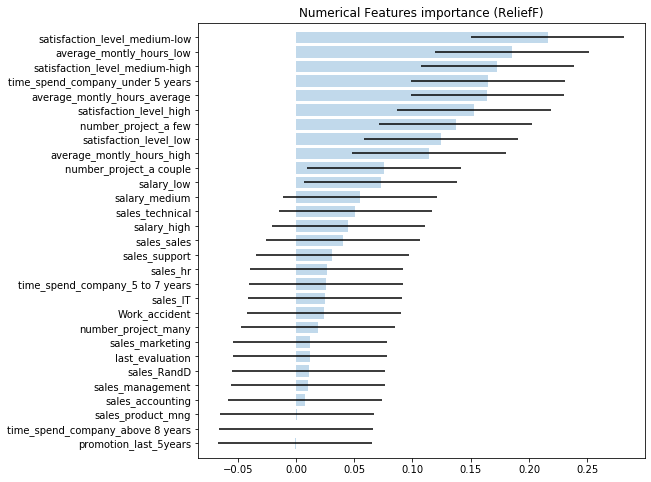

In [251]:
print ("Graphical plot of feature importance:")
turnover.plot_importance()

## C. Drop Not Relevant Features

In [252]:
turnover.drop_columns('sales_IT')
turnover.drop_columns('sales_RandD')
turnover.drop_columns('sales_accounting')
turnover.drop_columns('sales_hr')
turnover.drop_columns('sales_management')
turnover.drop_columns('sales_marketing')
turnover.drop_columns('sales_product_mng')
turnover.drop_columns('sales_sales')
turnover.drop_columns('sales_support')
turnover.drop_columns('sales_technical')
turnover.drop_columns('promotion_last_5years')

## C. Dataset Splitting

In [253]:
#Dataset Split: **Creating the test set**
X, y = turnover.split(test_size= 0.2)

#Or

X, y = turnover.split(seed=1)

X.train.head(5)

,Work_accident,last_evaluation,number_project_a couple,number_project_a few,number_project_many,salary_high,salary_low,salary_medium,satisfaction_level_high,satisfaction_level_low,satisfaction_level_medium-high,satisfaction_level_medium-low,time_spend_company_5 to 7 years,time_spend_company_above 8 years,time_spend_company_under 5 years,average_montly_hours_low,average_montly_hours_average,average_montly_hours_high
2336,0.0,0.660247,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12678,0.0,0.876883,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5402,1.0,0.535738,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12412,0.0,0.221972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6634,0.0,0.613619,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## B. Cross Validation

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline))

F1: 0.7755474452554745


## D. Check Results: Weighted F1

In [255]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report


clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1:', f1_score(y.test, pred_baseline,))
print(classification_report(y.test,pred_baseline))

F1: 0.7755474452554745
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1968
         1.0       0.82      0.74      0.78       577

    accuracy                           0.90      2545
   macro avg       0.87      0.84      0.86      2545
weighted avg       0.90      0.90      0.90      2545



## Additional Info

##  Regularization With Logistic Regression

In [118]:
from dataset import Dataset as dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from typing import List
from skrebate import ReliefF

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [119]:
def coefficients_behavior(X, y, cs, penalty='l1'):
    
    clf = LogisticRegression(penalty=penalty, solver='liblinear',
                             tol=1e-6, max_iter=int(1e6),
                             warm_start=True, intercept_scaling=10000.)
    coefs_ = []
    for c in cs[::-1]:
        clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())

    return coefs_

In [120]:
def plot_behaviour(cs, coefs):
    coefs = np.array(coefs)
    plt.figure(figsize=(8, 6))

    plt.axhline(0, c='k', alpha=0.4)
    plt.axvline(0, c='k')
    plt.plot(np.log10(cs), coefs, linewidth=0.8)

    plt.xlabel('log(C)')
    plt.ylabel('Coefficients')
    plt.title('Logistic Regression Path')
    plt.axis('tight')
    plt.show()

<Figure size 720x720 with 0 Axes>

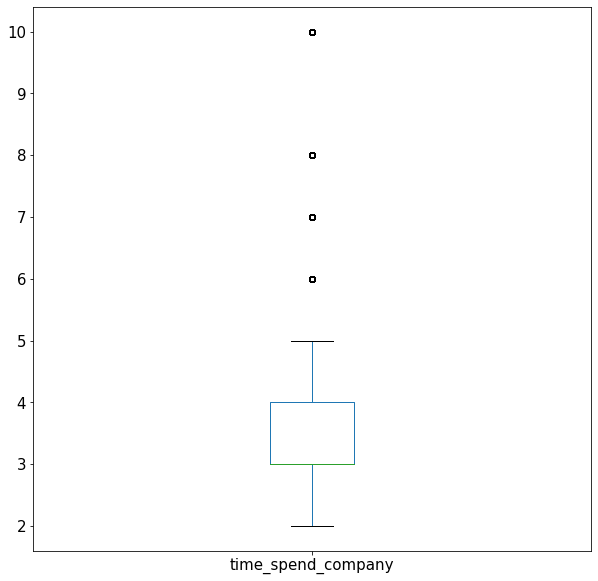

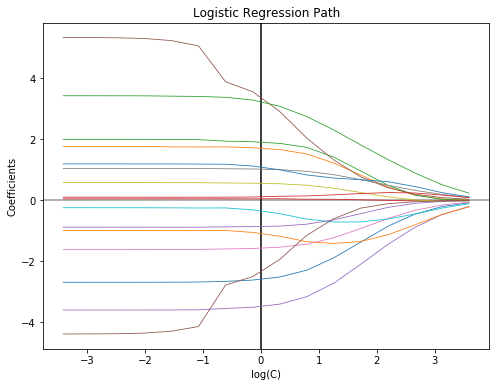

In [121]:
cs = l1_min_c(X.train, y.train, loss='log') * np.logspace(0, 7, 16)

coefs = coefficients_behavior(X.train, y.train, cs, penalty='l2')
plot_behaviour(cs, coefs)

As $\lambda$ increases, more variables' coefficients go to 0. Once a variable has a 0 coefficient, it has no impact on the model anymore. So, as $\lambda$ increases, the model uses fewer and fewer variables. This is what we mean by a sparse solution - it only uses a few variables in the dataset.

The SciKit implementation of Logistic Regression uses the parameter $C$, instead of $\lambda$. Remember that $C$ is just the opposite, so, the smaller the $C$, more features aproach to 0. 